In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'China'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without China' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>3000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Last_day_df

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,


In [11]:
Important_countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', 'China',
                      'United Kingdom',# 'Ireland', 'Norway',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Important_countries}

In [12]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 7
for cun in Important_countries:
    df = DF_Dict[cun]
    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [13]:
DC = DF_Dict['India'].columns
DF_Dict['India'].tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-03-26,727,20,45,65,662,0.307692,0.910591,533,46,30,16,0.347826
2020-03-27,887,20,73,93,794,0.215054,0.895152,643,68,53,15,0.220588
2020-03-28,987,24,84,108,879,0.222222,0.890578,657,81,61,20,0.246914
2020-03-29,1024,27,95,122,902,0.221311,0.880859,628,88,68,20,0.227273
2020-03-30,1251,32,102,134,1117,0.238806,0.892886,752,97,75,22,0.226804
2020-03-31,1397,35,123,158,1239,0.221519,0.886901,861,108,83,25,0.231481
2020-04-01,1998,58,148,206,1792,0.281553,0.896897,1341,151,105,46,0.304636
2020-04-02,2543,72,191,263,2280,0.273764,0.896579,1816,198,146,52,0.262626
2020-04-03,2567,72,192,264,2303,0.272727,0.897156,1680,171,119,52,0.304094


In [14]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,


In [15]:
def plotwithx(x, cols):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (17, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in C[:-2]:
                plt.xscale('log')

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
            for cun in DF_Dict:
                df = DF_Dict[cun]
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                        df[col],
                        label = cun,
                        linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-'
                        )
            plt.legend(DF_Dict.keys())
            plt.plot()


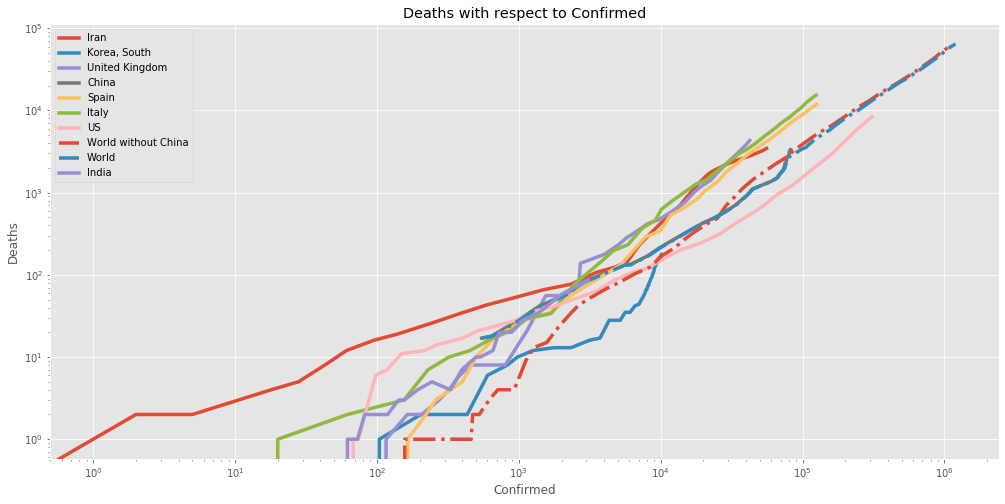

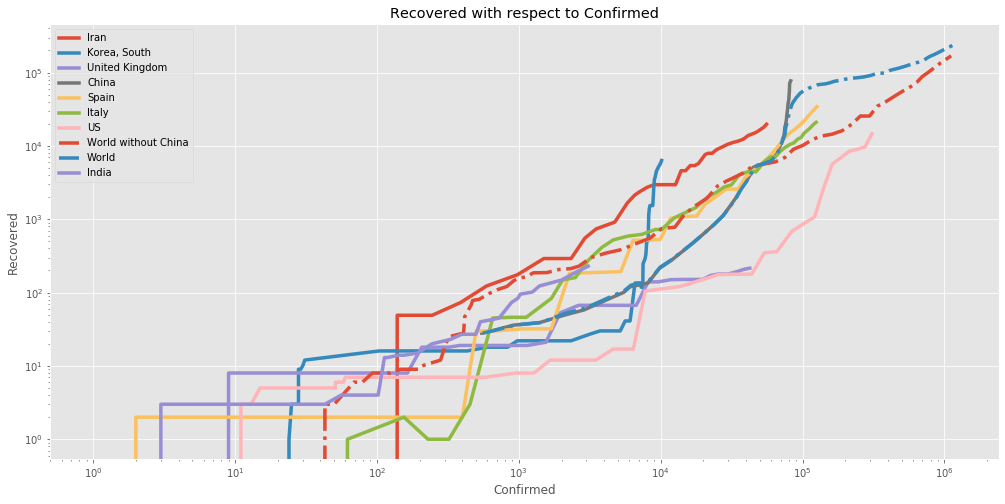

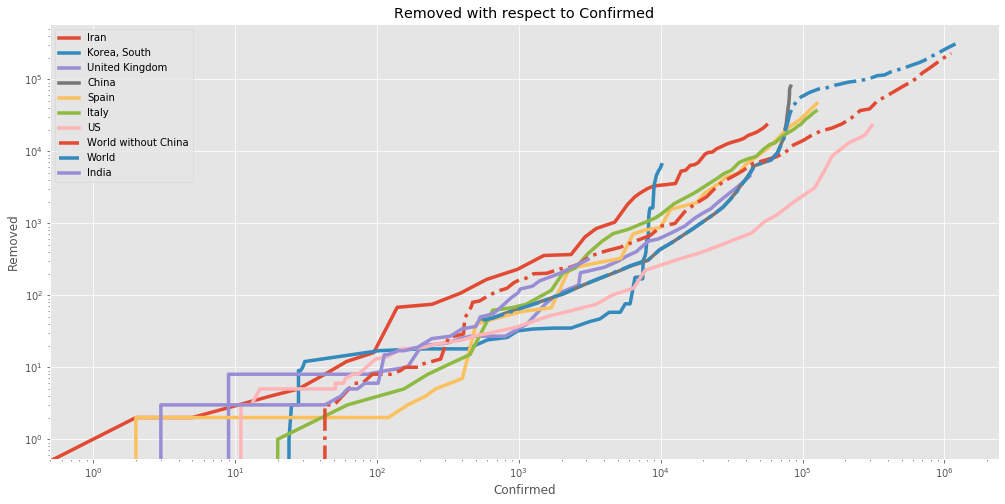

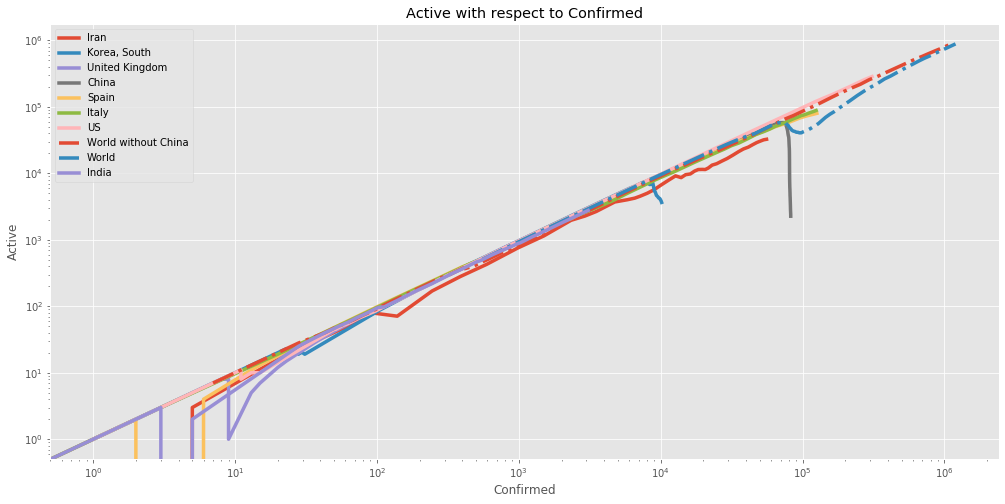

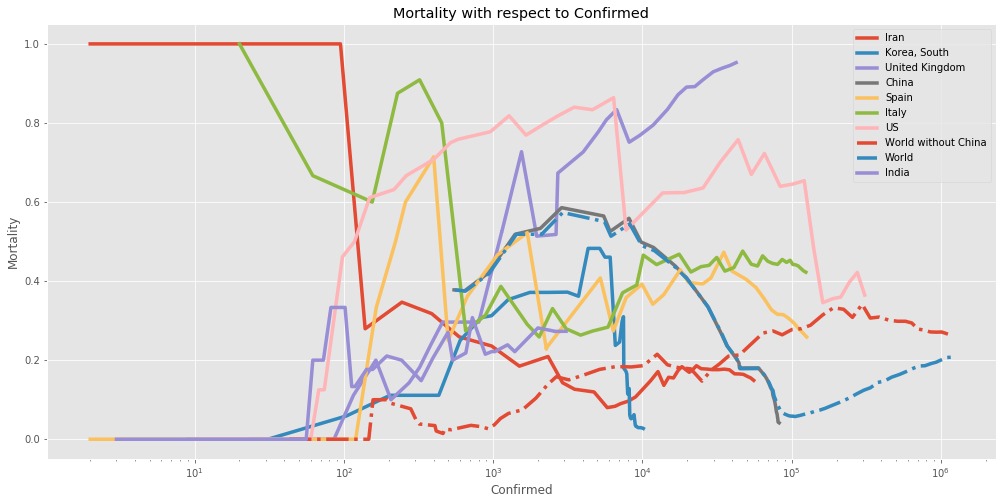

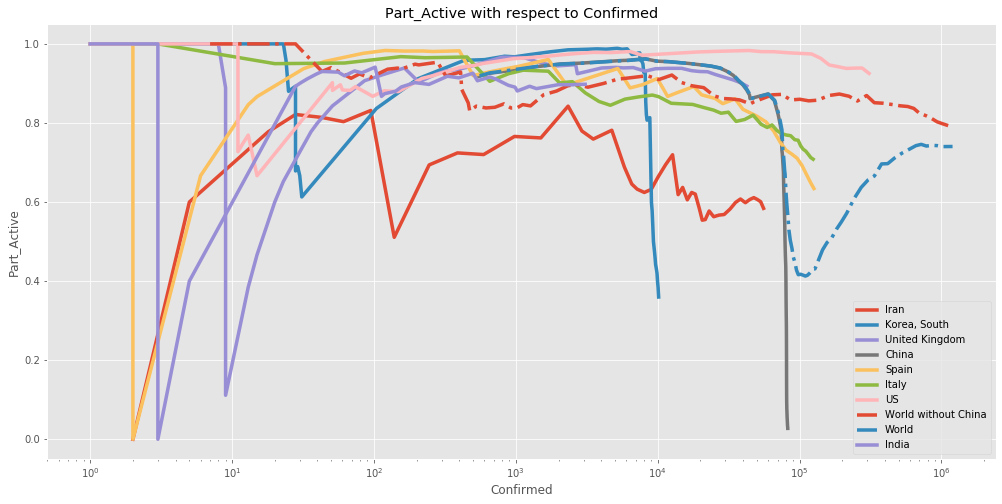

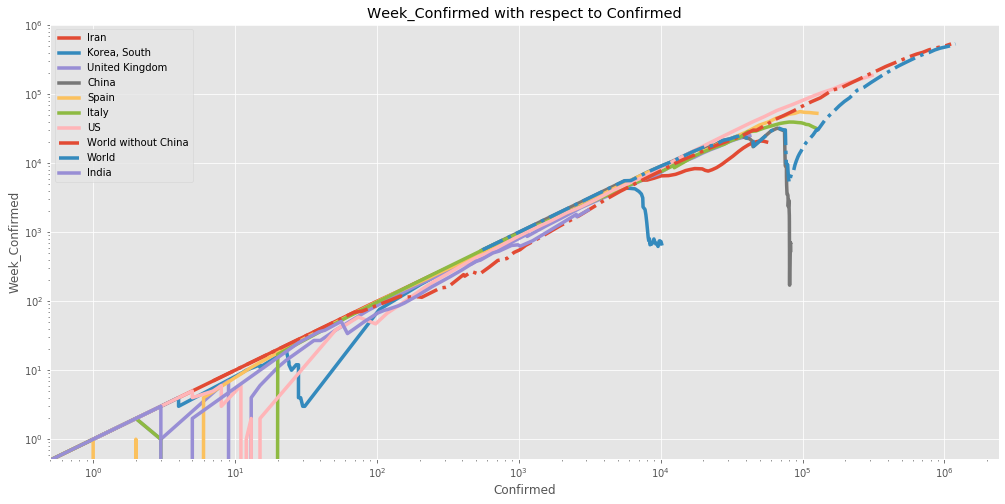

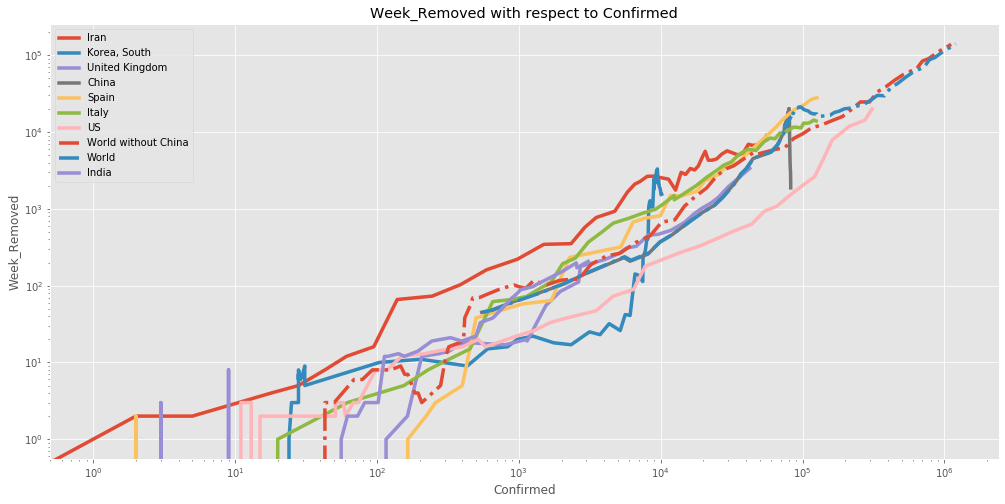

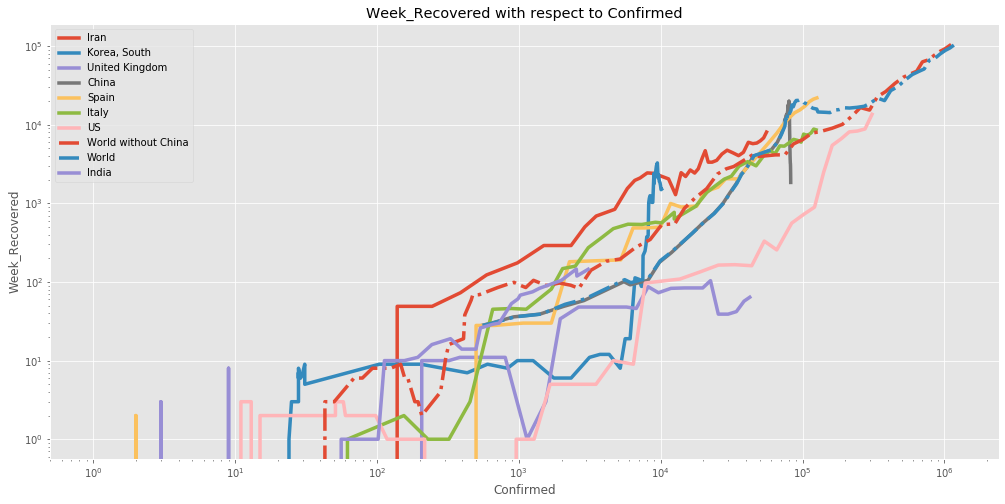

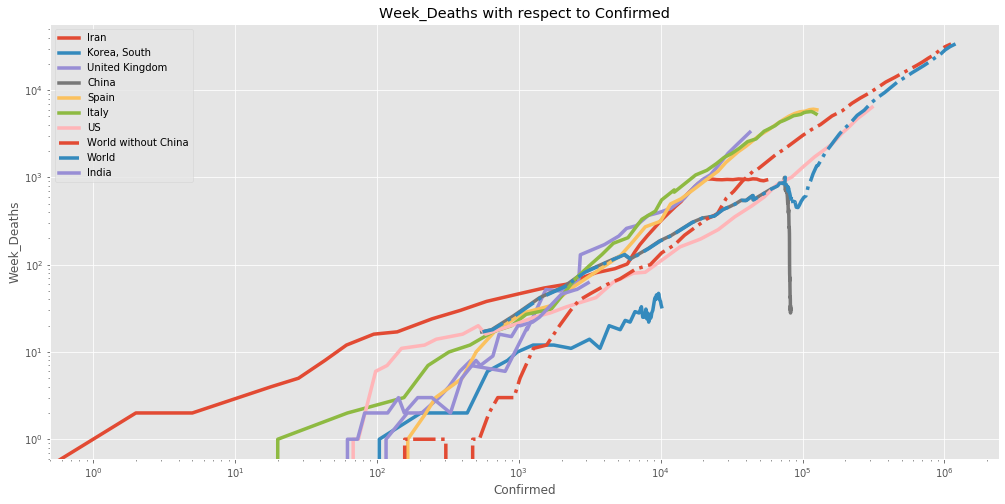

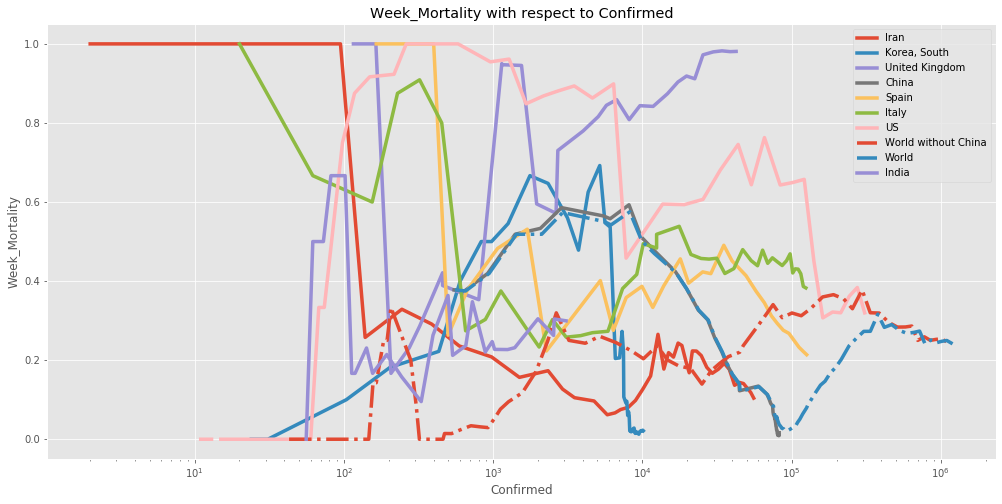

In [16]:
plotwithx('Confirmed', DC)

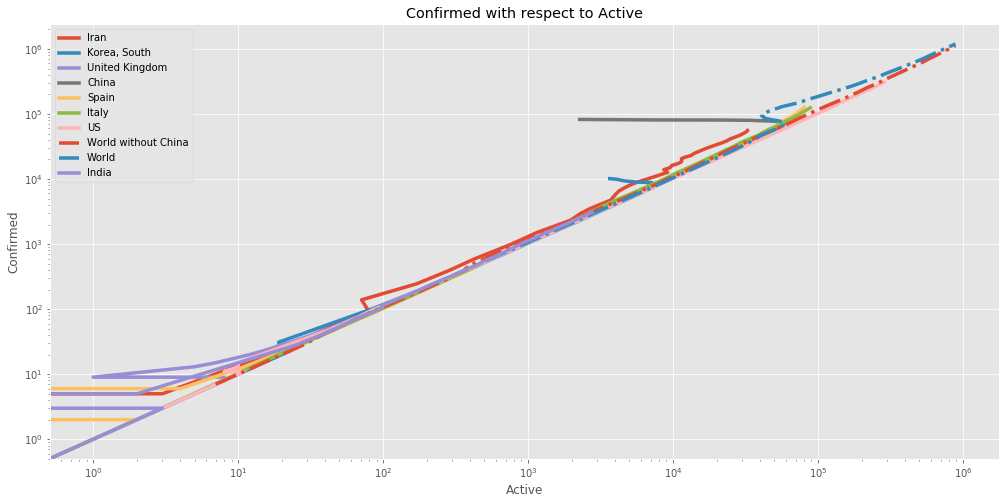

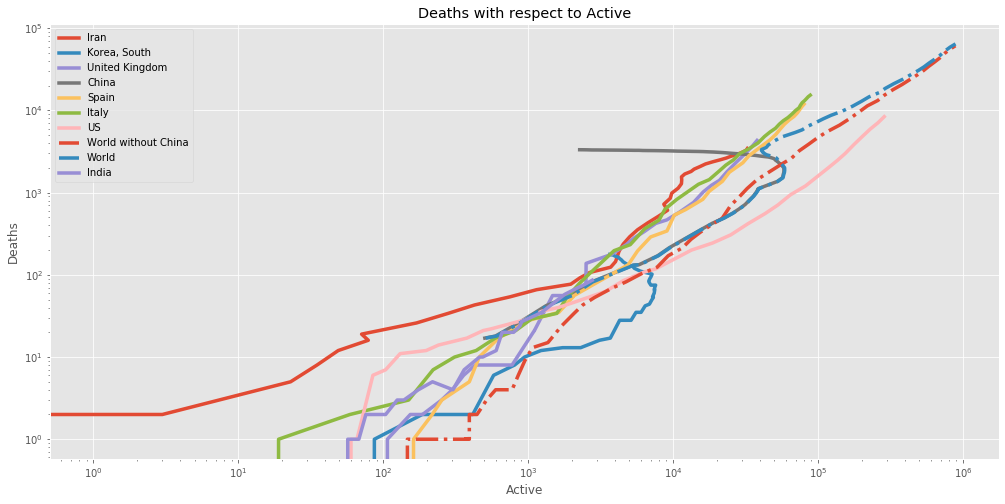

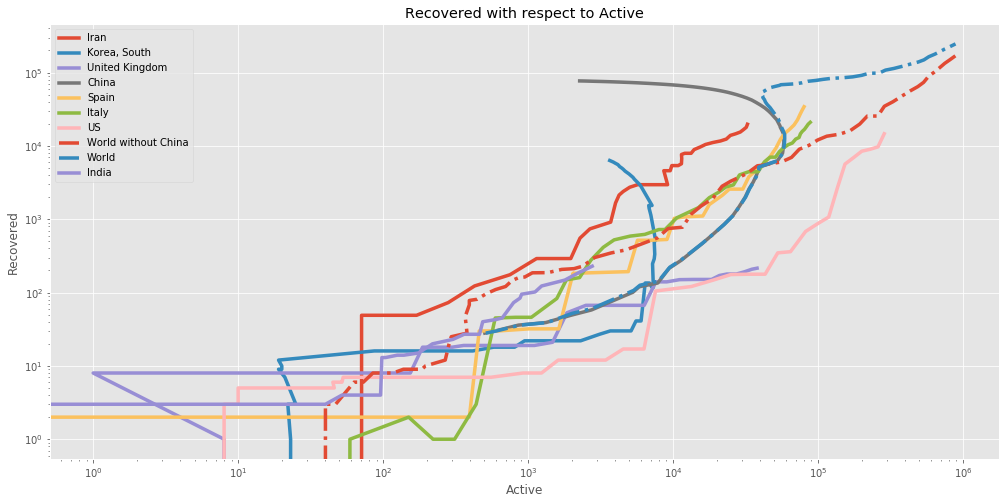

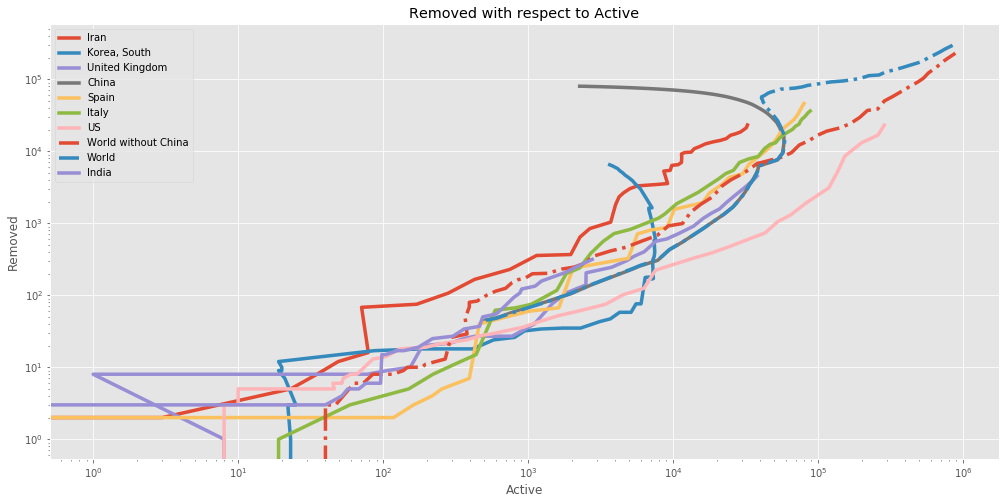

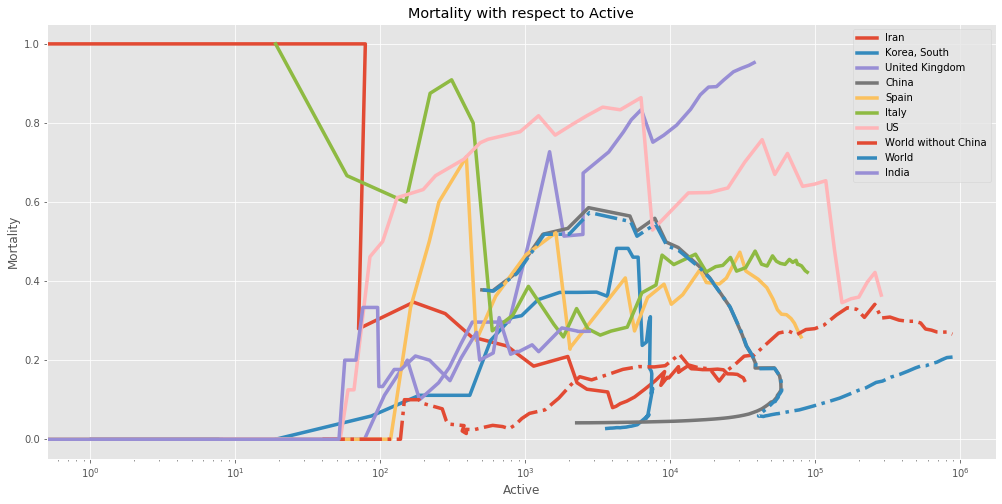

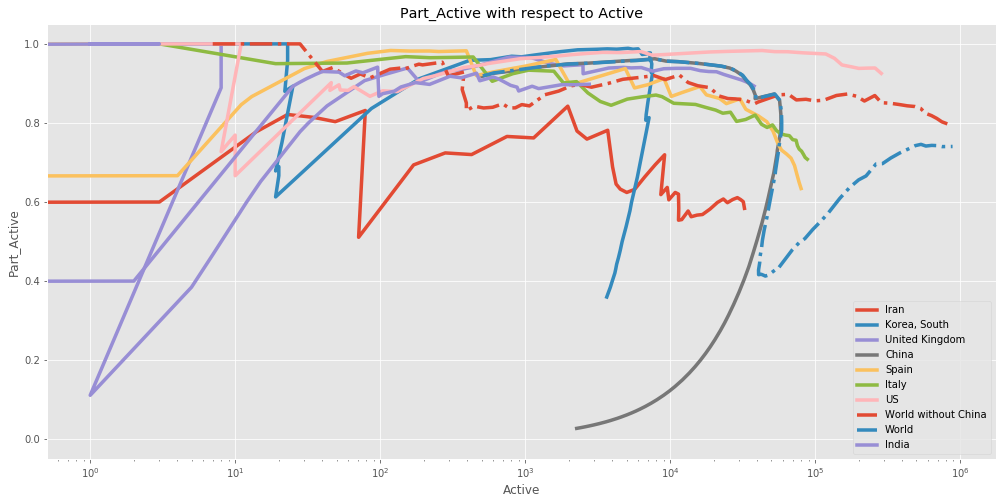

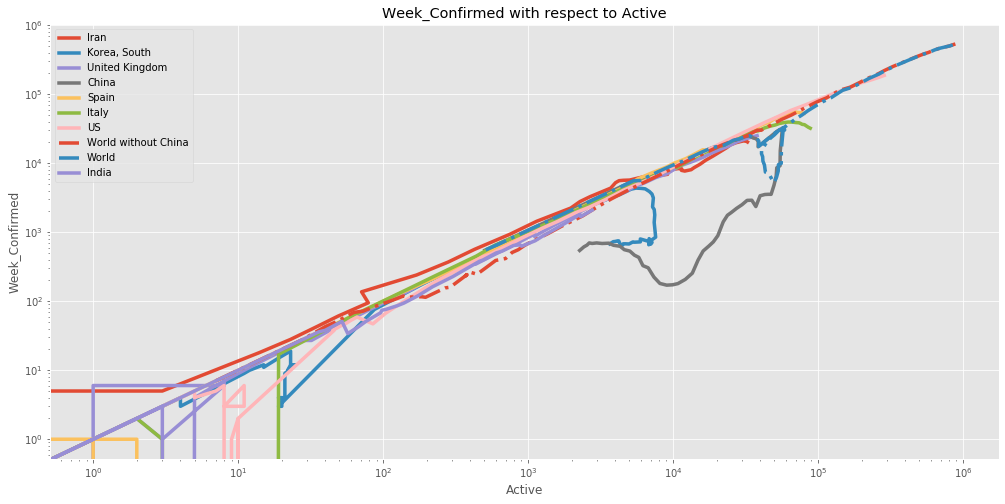

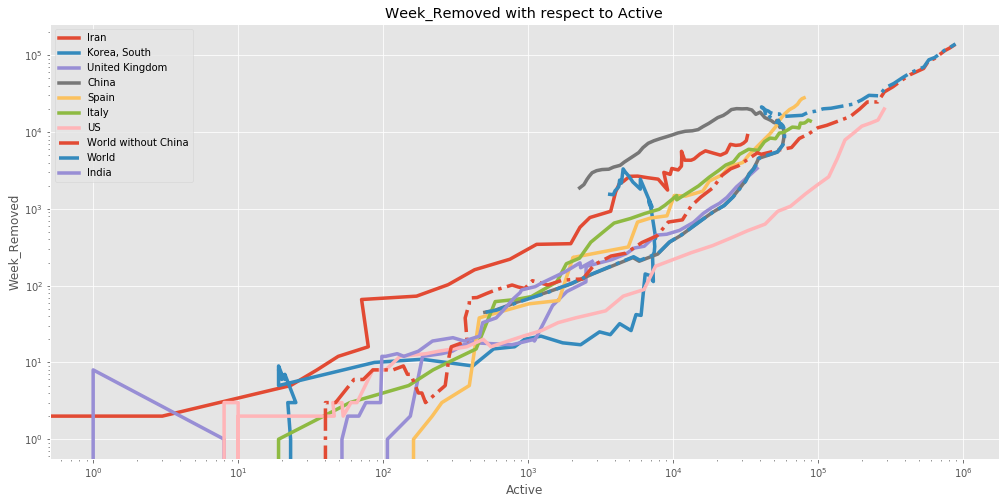

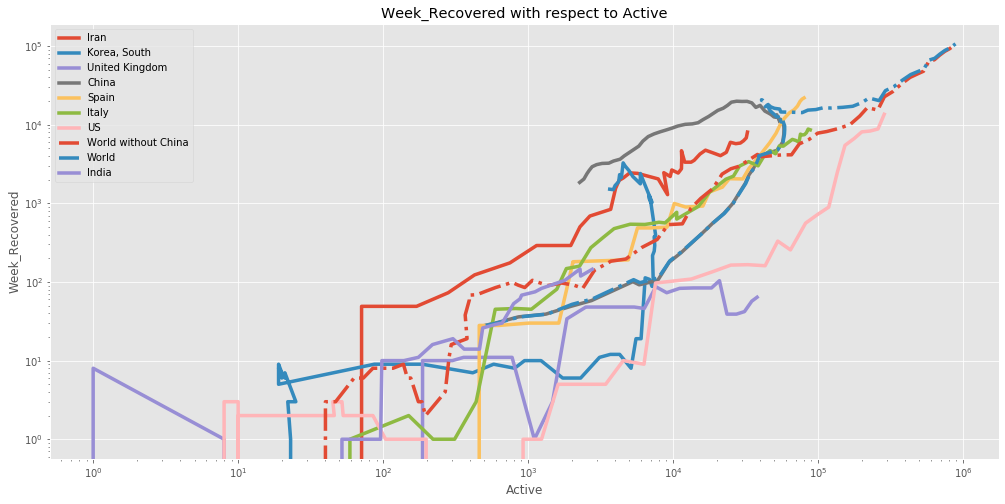

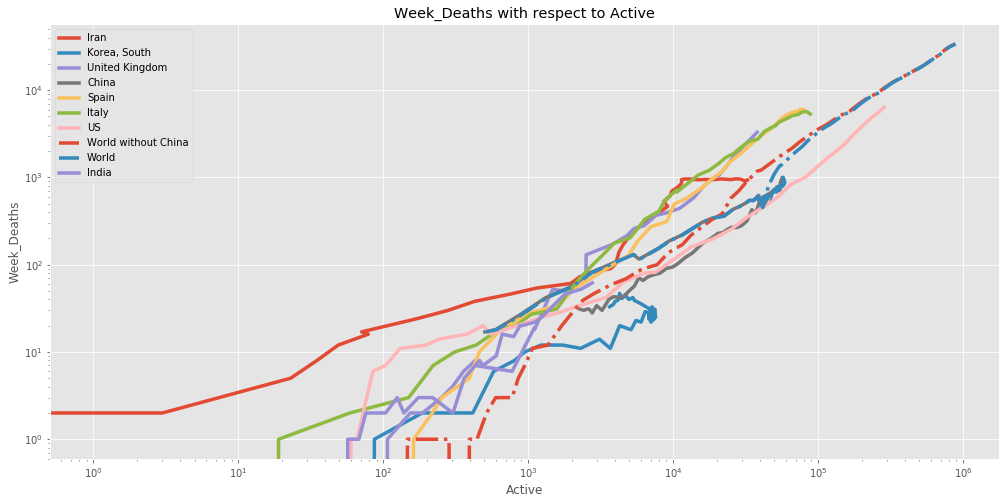

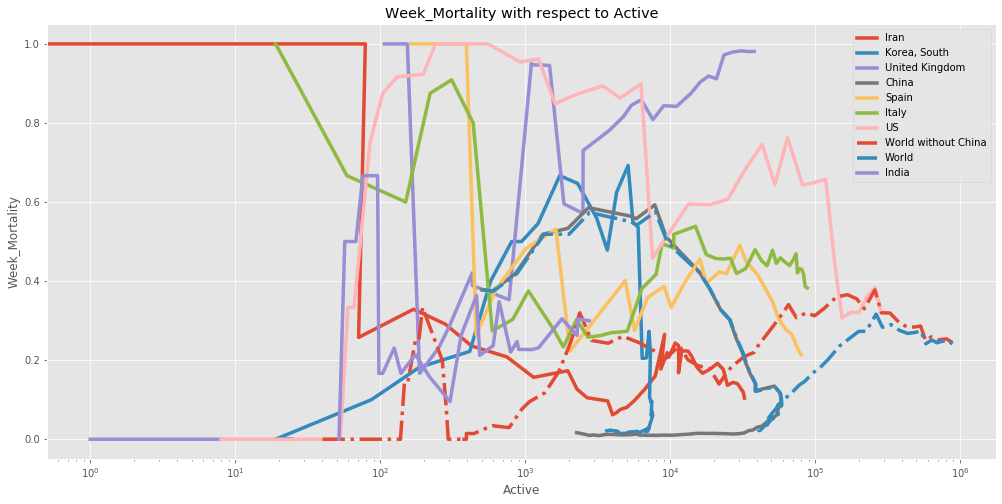

In [17]:
plotwithx('Active', DC)

In [18]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,


In [19]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
